In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
caltech_dir = "/content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/train"
categories = ["man", "woman"]
num_classes = len(categories)

image_w = 128
image_h = 128

pixels = image_h * image_w * 3

X = []
y = []

for idx, category in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(num_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + category
    files = glob.glob(image_dir+"/*.jpg")
    print(category, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(category, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0  이면 man
#0 1  이면 woman 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("/content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/gender_data1.npy", xy)

print("ok", len(y))

man  파일 길이 :  774
man  :  /content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/train/man/image_1007.jpg
man  :  /content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/train/man/image_1405.jpg
woman  파일 길이 :  760
woman  :  /content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/train/woman/image_1006.jpg
woman  :  /content/drive/MyDrive/Colab Notebooks/gender_classification/dataset/train/woman/image_931.jpg
ok 1534


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [5]:
categories = ["man", "woman"]
num_classes = len(categories)

#일반화
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [6]:
model = Sequential()
model.add(Conv2D(64, 3, strides= 1, activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(Conv2D(64, 3, strides= 1, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(128, 3, strides=1, activation='relu', padding='same'))
model.add(Conv2D(128, 3, strides=1, activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(256, 3, strides=1, activation='relu', padding='same'))
model.add(Conv2D(256, 3, strides=1, activation='relu', padding='same'))
model.add(Conv2D(256, 3, strides=1, activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(512, 3, strides=1, activation='relu', padding='same'))
model.add(Conv2D(512, 3, strides=1, activation='relu', padding='same'))
model.add(Conv2D(512, 3, strides=1, activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), strides=2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0

In [8]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [9]:
history = model.fit(X_train, y_train, 
                    batch_size = 32, 
                    epochs = 50, 
                    verbose = 1,
                    validation_data=(X_test, y_test))

Epoch 1/50
36/36 [==============================] - 18s 280ms/step - loss: 6.0137 - accuracy: 0.6078 - val_loss: 12.1273 - val_accuracy: 0.4740
Epoch 2/50
36/36 [==============================] - 5s 148ms/step - loss: 1.2259 - accuracy: 0.6948 - val_loss: 2.2883 - val_accuracy: 0.5260
Epoch 3/50
36/36 [==============================] - 6s 154ms/step - loss: 0.6810 - accuracy: 0.7339 - val_loss: 0.7600 - val_accuracy: 0.4740
Epoch 4/50
36/36 [==============================] - 5s 150ms/step - loss: 0.5795 - accuracy: 0.7600 - val_loss: 1.4248 - val_accuracy: 0.5260
Epoch 5/50
36/36 [==============================] - 5s 151ms/step - loss: 0.5428 - accuracy: 0.7696 - val_loss: 2.0117 - val_accuracy: 0.4740
Epoch 6/50
36/36 [==============================] - 5s 152ms/step - loss: 0.4823 - accuracy: 0.7965 - val_loss: 0.8178 - val_accuracy: 0.4766
Epoch 7/50
36/36 [==============================] - 6s 158ms/step - loss: 0.4529 - accuracy: 0.8209 - val_loss: 1.4394 - val_accuracy: 0.4740
Epoc

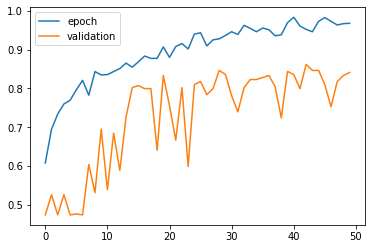

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['epoch', 'validation'], loc = 'upper left')
plt.show()

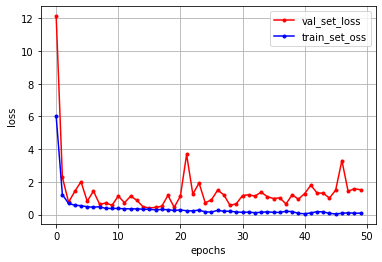

In [11]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()